In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### TODOS JUNTOS

In [3]:
LQ800_results_16bins_beta = np.loadtxt('saved-results/LQup800GeV.txt')[0]
LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[1]
LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[2]

LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup800GeV.txt')[9]
LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup800GeV.txt')[10]
LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup800GeV.txt')[11]

In [4]:
LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[0]
LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[1]
LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[2]

LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1000GeV.txt')[9]
LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1000GeV.txt')[10]
LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQup1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQup1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQup1800GeV.txt')[11]

In [9]:
results_16bins_beta00 = [LQ800_results_16bins_beta[0],LQ1000_results_16bins_beta[0],LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta00 = [LQ800_results_16bins_beta_plus[0],LQ1000_results_16bins_beta_plus[0],LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta00 = [LQ800_results_16bins_beta_min[0],LQ1000_results_16bins_beta_min[0],LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta00 = [LQ800_results_MLL_KDE_beta[0],LQ1000_results_MLL_KDE_beta[0],LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta00 = [LQ800_results_MLL_KDE_beta_plus[0],LQ1000_results_MLL_KDE_beta_plus[0],LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta00 = [LQ800_results_MLL_KDE_beta_min[0],LQ1000_results_MLL_KDE_beta_min[0],LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta01 = [LQ800_results_16bins_beta[1],LQ1000_results_16bins_beta[1],LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta01 = [LQ800_results_16bins_beta_plus[1],LQ1000_results_16bins_beta_plus[1],LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta01 = [LQ800_results_16bins_beta_min[1],LQ1000_results_16bins_beta_min[1],LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta01 = [LQ800_results_MLL_KDE_beta[1],LQ1000_results_MLL_KDE_beta[1],LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta01 = [LQ800_results_MLL_KDE_beta_plus[1],LQ1000_results_MLL_KDE_beta_plus[1],LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta01 = [LQ800_results_MLL_KDE_beta_min[1],LQ1000_results_MLL_KDE_beta_min[1],LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta03 = [LQ800_results_16bins_beta[2],LQ1000_results_16bins_beta[2],LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta03 = [LQ800_results_16bins_beta_plus[2],LQ1000_results_16bins_beta_plus[2],LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta03 = [LQ800_results_16bins_beta_min[2],LQ1000_results_16bins_beta_min[2],LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta03 = [LQ800_results_MLL_KDE_beta[2],LQ1000_results_MLL_KDE_beta[2],LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta03 = [LQ800_results_MLL_KDE_beta_plus[2],LQ1000_results_MLL_KDE_beta_plus[2],LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta03 = [LQ800_results_MLL_KDE_beta_min[2],LQ1000_results_MLL_KDE_beta_min[2],LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta05 = [LQ800_results_16bins_beta[3],LQ1000_results_16bins_beta[3],LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta05 = [LQ800_results_16bins_beta_plus[3],LQ1000_results_16bins_beta_plus[3],LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta05 = [LQ800_results_16bins_beta_min[3],LQ1000_results_16bins_beta_min[3],LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta05 = [LQ800_results_MLL_KDE_beta[3],LQ1000_results_MLL_KDE_beta[3],LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta05 = [LQ800_results_MLL_KDE_beta_plus[3],LQ1000_results_MLL_KDE_beta_plus[3],LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta05 = [LQ800_results_MLL_KDE_beta_min[3],LQ1000_results_MLL_KDE_beta_min[3],LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta07 = [LQ800_results_16bins_beta[4],LQ1000_results_16bins_beta[4],LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta07 = [LQ800_results_16bins_beta_plus[4],LQ1000_results_16bins_beta_plus[4],LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta07 = [LQ800_results_16bins_beta_min[4],LQ1000_results_16bins_beta_min[4],LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta07 = [LQ800_results_MLL_KDE_beta[4],LQ1000_results_MLL_KDE_beta[4],LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta07 = [LQ800_results_MLL_KDE_beta_plus[4],LQ1000_results_MLL_KDE_beta_plus[4],LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta07 = [LQ800_results_MLL_KDE_beta_min[4],LQ1000_results_MLL_KDE_beta_min[4],LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]


results_16bins_beta09 = [LQ800_results_16bins_beta[5],LQ1000_results_16bins_beta[5],LQ1200_results_16bins_beta[5],LQ1400_results_16bins_beta[5],LQ1600_results_16bins_beta[5],LQ1800_results_16bins_beta[5]]
results_16bins_plus_beta09 = [LQ800_results_16bins_beta_plus[5],LQ1000_results_16bins_beta_plus[5],LQ1200_results_16bins_beta_plus[5],LQ1400_results_16bins_beta_plus[5],LQ1600_results_16bins_beta_plus[5],LQ1800_results_16bins_beta_plus[5]]
results_16bins_min_beta09 = [LQ800_results_16bins_beta_min[5],LQ1000_results_16bins_beta_min[5],LQ1200_results_16bins_beta_min[5],LQ1400_results_16bins_beta_min[5],LQ1600_results_16bins_beta_min[5],LQ1800_results_16bins_beta_min[5]]

results_MLL_KDE_beta09 = [LQ800_results_MLL_KDE_beta[5],LQ1000_results_MLL_KDE_beta[5],LQ1200_results_MLL_KDE_beta[5],LQ1400_results_MLL_KDE_beta[5],LQ1600_results_MLL_KDE_beta[5],LQ1800_results_MLL_KDE_beta[5]]
results_MLL_KDE_plus_beta09 = [LQ800_results_MLL_KDE_beta_plus[5],LQ1000_results_MLL_KDE_beta_plus[5],LQ1200_results_MLL_KDE_beta_plus[5],LQ1400_results_MLL_KDE_beta_plus[5],LQ1600_results_MLL_KDE_beta_plus[5],LQ1800_results_MLL_KDE_beta_plus[5]]
results_MLL_KDE_min_beta09 = [LQ800_results_MLL_KDE_beta_min[5],LQ1000_results_MLL_KDE_beta_min[5],LQ1200_results_MLL_KDE_beta_min[5],LQ1400_results_MLL_KDE_beta_min[5],LQ1600_results_MLL_KDE_beta_min[5],LQ1800_results_MLL_KDE_beta_min[5]]


results_16bins_beta1 = [LQ800_results_16bins_beta[6],LQ1000_results_16bins_beta[6],LQ1200_results_16bins_beta[6],LQ1400_results_16bins_beta[6],LQ1600_results_16bins_beta[6],LQ1800_results_16bins_beta[6]]
results_16bins_plus_beta1 = [LQ800_results_16bins_beta_plus[6],LQ1000_results_16bins_beta_plus[6],LQ1200_results_16bins_beta_plus[6],LQ1400_results_16bins_beta_plus[6],LQ1600_results_16bins_beta_plus[6],LQ1800_results_16bins_beta_plus[6]]
results_16bins_min_beta1 = [LQ800_results_16bins_beta_min[6],LQ1000_results_16bins_beta_min[6],LQ1200_results_16bins_beta_min[6],LQ1400_results_16bins_beta_min[6],LQ1600_results_16bins_beta_min[6],LQ1800_results_16bins_beta_min[6]]

results_MLL_KDE_beta1 = [LQ800_results_MLL_KDE_beta[6],LQ1000_results_MLL_KDE_beta[6],LQ1200_results_MLL_KDE_beta[6],LQ1400_results_MLL_KDE_beta[6],LQ1600_results_MLL_KDE_beta[6],LQ1800_results_MLL_KDE_beta[6]]
results_MLL_KDE_plus_beta1 = [LQ800_results_MLL_KDE_beta_plus[6],LQ1000_results_MLL_KDE_beta_plus[6],LQ1200_results_MLL_KDE_beta_plus[6],LQ1400_results_MLL_KDE_beta_plus[6],LQ1600_results_MLL_KDE_beta_plus[6],LQ1800_results_MLL_KDE_beta_plus[6]]
results_MLL_KDE_min_beta1 = [LQ800_results_MLL_KDE_beta_min[6],LQ1000_results_MLL_KDE_beta_min[6],LQ1200_results_MLL_KDE_beta_min[6],LQ1400_results_MLL_KDE_beta_min[6],LQ1600_results_MLL_KDE_beta_min[6],LQ1800_results_MLL_KDE_beta_min[6]]

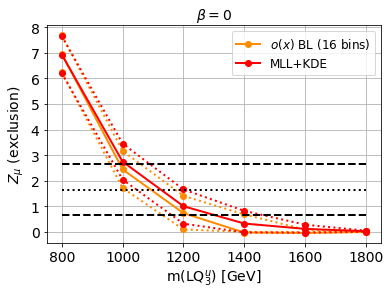

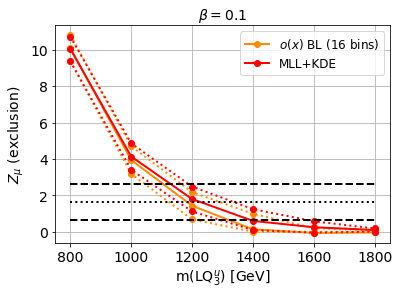

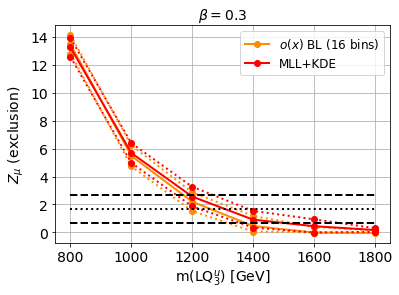

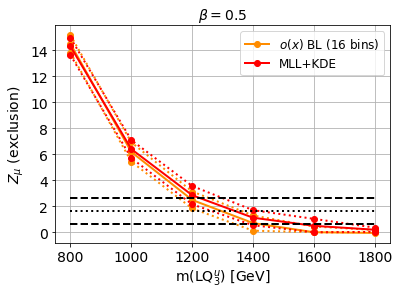

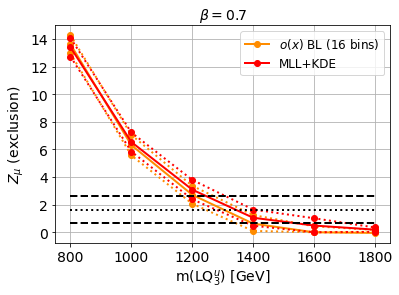

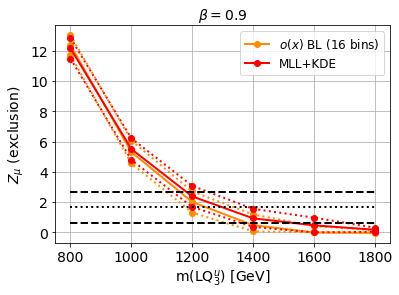

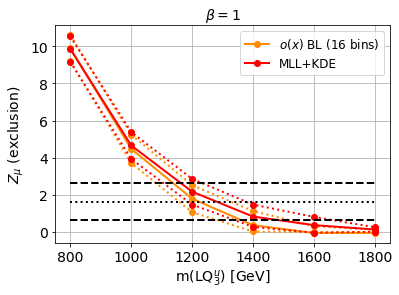

In [10]:
masses = [800, 1000, 1200, 1400, 1600, 1800]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta00, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta00, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta01, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta1, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta1, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [11]:
# Interpolation, cubic
res_f_16bins_beta00 = interp1d(masses, results_16bins_beta00, kind='quadratic')
res_f_16bins_plus_beta00 = interp1d(masses, results_16bins_plus_beta00, kind='quadratic')
res_f_16bins_min_beta00 = interp1d(masses, results_16bins_min_beta00, kind='quadratic')
res_f_MLL_KDE_beta00 = interp1d(masses, results_MLL_KDE_beta00, kind='quadratic')
res_f_MLL_KDE_plus_beta00 = interp1d(masses, results_MLL_KDE_plus_beta00, kind='quadratic')
res_f_MLL_KDE_min_beta00 = interp1d(masses, results_MLL_KDE_min_beta00, kind='quadratic')

res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

res_f_16bins_beta1 = interp1d(masses, results_16bins_beta1, kind='quadratic')
res_f_16bins_plus_beta1 = interp1d(masses, results_16bins_plus_beta1, kind='quadratic')
res_f_16bins_min_beta1 = interp1d(masses, results_16bins_min_beta1, kind='quadratic')
res_f_MLL_KDE_beta1 = interp1d(masses, results_MLL_KDE_beta1, kind='quadratic')
res_f_MLL_KDE_plus_beta1 = interp1d(masses, results_MLL_KDE_plus_beta1, kind='quadratic')
res_f_MLL_KDE_min_beta1 = interp1d(masses, results_MLL_KDE_min_beta1, kind='quadratic')

In [12]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1100, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [13]:
beta = [0,0.1,0.3,0.5,0.7,0.9,1]


mass_16bins_beta00 = solvemass(res_f_16bins_beta00, 1.64)
mass_16bins_plus_beta00 = solvemass(res_f_16bins_plus_beta00, 1.64)
mass_16bins_min_beta00 = solvemass(res_f_16bins_min_beta00, 1.64)
mass_MLL_beta00 = solvemass(res_f_MLL_KDE_beta00, 1.64)
mass_MLL_plus_beta00 = solvemass(res_f_MLL_KDE_plus_beta00, 1.64)
mass_MLL_min_beta00 = solvemass(res_f_MLL_KDE_min_beta00, 1.64)

mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins_beta1 = solvemass(res_f_16bins_beta1, 1.64)
mass_16bins_plus_beta1 = solvemass(res_f_16bins_plus_beta1, 1.64)
mass_16bins_min_beta1 = solvemass(res_f_16bins_min_beta1, 1.64)
mass_MLL_beta1 = solvemass(res_f_MLL_KDE_beta1, 1.64)
mass_MLL_plus_beta1 = solvemass(res_f_MLL_KDE_plus_beta1, 1.64)
mass_MLL_min_beta1 = solvemass(res_f_MLL_KDE_min_beta1, 1.64)

mass_16bins = [mass_16bins_beta00, mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09, mass_16bins_beta1]
mass_16bins_plus = [mass_16bins_plus_beta00, mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09, mass_16bins_plus_beta1]
mass_16bins_min = [mass_16bins_min_beta00, mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09, mass_16bins_min_beta1]
mass_MLL = [mass_MLL_beta00, mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09, mass_MLL_beta1]
mass_MLL_plus = [mass_MLL_plus_beta00, mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09, mass_MLL_plus_beta1]
mass_MLL_min = [mass_MLL_min_beta00, mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09, mass_MLL_min_beta1]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[1065.7113705520317, 1176.4775247528517, 1251.3502405188478, 1276.9556975210003, 1287.102562564904, 1234.234731874149, 1216.8056001247153]
[1159.4484615774386, 1276.0867173757297, 1330.734561655703, 1349.9845403779095, 1350.6072058369466, 1322.4382440116224, 1313.8608118315678]
[1005.1938271816629, 1094.6598842164096, 1188.9559947418538, 1216.0070840283688, 1233.5575021854697, 1169.3127477745006, 1141.1984326038591]
[1101.6260389679774, 1220.8840831212326, 1293.8872165847806, 1321.771761227801, 1325.2645750178276, 1279.568748882771, 1265.331304961145]
[1203.2830293337004, 1323.3975495321347, 1381.96741351626, 1410.3256840838612, 1400.7024542627878, 1381.2101959451957, 1369.1521229278915]
[1030.3793759915832, 1134.7322676629203, 1221.5338594729035, 1246.748142216108, 1262.8602735909067, 1203.2410099554481, 1182.3312381201656]


In [14]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998
beta_ATLAS = [0,0.0010521,0.0057888,0.010101,0.011322,0.017524,0.020202,0.024171,0.030303,0.030715,0.036537,0.040404,0.040997,0.044161,0.046326,0.048202,0.050505,0.050582,0.054423,0.060033,0.060606,0.067623,0.070707,0.076512,0.080808,0.086018,0.090909,0.095446,0.10101,0.10447,0.11111,0.11342,0.12121,0.12329,0.13131,0.13566,0.14141,0.15152,0.15223,0.16162,0.17172,0.17465,0.18182,0.19192,0.20202,0.20219,0.21212,0.22222,0.23232,0.23273,0.24242,0.25253,0.26263,0.26544,0.27273,0.28283,0.29293,0.30231,0.30303,0.31313,0.32323,0.33333,0.34343,0.34742,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41214,0.41414,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.55654,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68687,0.69697,0.70707,0.71717,0.72683,0.72727,0.73737,0.74747,0.75758,0.76768,0.77778,0.78788,0.79798,0.80808,0.81818,0.82828,0.83838,0.84848,0.85859,0.86424,0.86869,0.87879,0.88889,0.89899,0.90909,0.91919,0.92929,0.93939,0.9444,0.94949,0.9596,0.9697,0.9798,0.9899,1]
mass_Z95CL_ATLAS = [751.02,755.56,771.72,784.32,787.88,804.04,810.61,820.2,835.38,836.36,852.53,866.65,868.69,884.85,901.01,917.17,932.86,933.33,949.49,965.66,966.99,981.82,987.79,997.98,1005.7,1014.1,1023,1030.3,1040.7,1046.5,1058.9,1062.6,1075.8,1078.8,1089.8,1094.9,1101.1,1110.5,1111.1,1118.4,1125.4,1127.3,1131.9,1137.8,1143.3,1143.4,1149,1154.3,1159.4,1159.6,1164.6,1169.6,1174.5,1175.8,1179.1,1183.7,1188,1191.9,1192.2,1196.1,1199.8,1203.4,1206.8,1208.1,1210,1212.9,1215.6,1218.1,1220.5,1222.6,1224.2,1224.7,1226.6,1228.3,1229.9,1231.3,1232.7,1233.9,1235,1236,1236.9,1237.7,1238.5,1239.2,1239.8,1240.4,1240.4,1241,1241.5,1242,1242.4,1242.8,1243.1,1243.3,1243.4,1243.5,1243.5,1243.3,1243.1,1242.8,1242.3,1241.8,1241.1,1240.4,1240.4,1239.7,1238.9,1238,1237.1,1236.1,1235.1,1233.9,1232.7,1231.4,1230,1228.6,1227,1225.3,1224.2,1223.5,1221.8,1219.9,1217.9,1215.9,1213.8,1211.5,1209.2,1208.1,1206.8,1204.4,1201.8,1199.3,1196.7,1194.1]

beta_ATLAS_plus1sig = [0, 0.016415868673050615, 0.019151846785225718, 0.016415868673050615, 0.015047879616963064, 0.016415868673050615, 0.025991792065663474, 0.04377564979480164, 0.06566347469220246, 0.07934336525307797, 0.09302325581395349, 0.13816689466484267, 0.19151846785225718, 0.24350205198358413, 0.29958960328317374, 0.3652530779753762, 0.4377564979480164, 0.5116279069767442, 0.5882352941176471, 0.679890560875513, 0.7729138166894665, 0.8467852257181943, 0.9151846785225718, 0.9658002735978112, 1]
mass_Z95CL_ATLAS_plus1sig = [540.1840490797546, 583.1288343558282, 604.601226993865, 627.6073619631902, 667.4846625766871, 708.8957055214723, 757.9754601226994, 802.4539877300614, 853.0674846625767, 908.282208588957, 949.6932515337423, 1000.3067484662577, 1047.8527607361964, 1076.993865030675, 1106.1349693251534, 1127.6073619631902, 1146.0122699386502, 1156.7484662576687, 1161.3496932515336, 1164.4171779141104, 1159.8159509202455, 1149.079754601227, 1138.3435582822085, 1121.4723926380368, 1104.601226993865]

beta_ATLAS_minus1sig = [0, 0.016415868673050615, 0.025991792065663474, 0.027359781121751026, 0.03146374829001368, 0.0506155950752394, 0.06703146374829001, 0.08207934336525308, 0.11627906976744186, 0.15321477428180574, 0.2024623803009576, 0.25718194254445964, 0.30916552667578656, 0.36662106703146374, 0.41997264021887826, 0.4746922024623803, 0.533515731874145, 0.5950752393980848, 0.66484268125855, 0.7564979480164159, 0.8385772913816689, 0.9069767441860465, 0.945280437756498, 0.9712722298221614, 1]
mass_Z95CL_ATLAS_minus1sig = [805.5214723926381, 834.6625766871166, 869.9386503067485, 909.8159509202454, 952.760736196319, 1006.4417177914111, 1043.2515337423313, 1100, 1149.079754601227, 1188.9570552147238, 1221.1656441717791, 1245.7055214723928, 1265.644171779141, 1288.6503067484664, 1308.588957055215, 1317.7914110429447, 1325.4601226993864, 1330.0613496932515, 1334.6625766871166, 1333.128834355828, 1326.993865030675, 1314.723926380368, 1303.9877300613498, 1276.3803680981596, 1261.0429447852762]

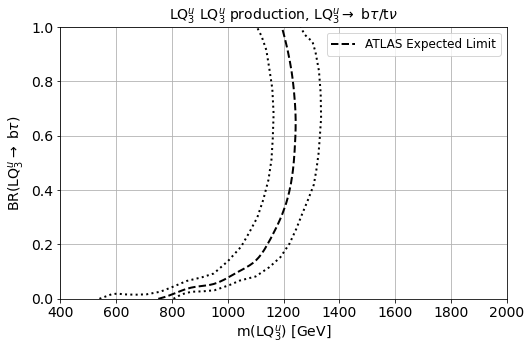

In [15]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

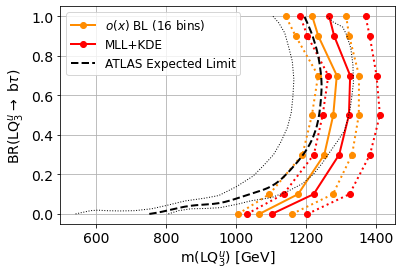

In [16]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':o', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':o', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':o', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':o', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

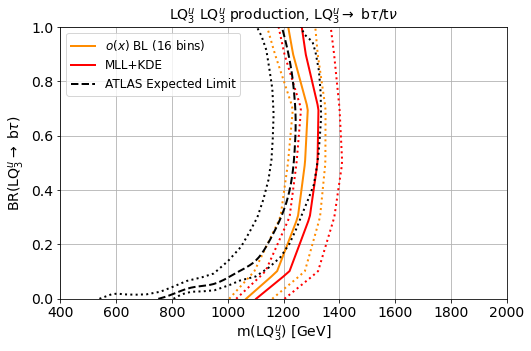

In [17]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='linear')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='linear')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='linear')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='linear')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='linear')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='linear')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

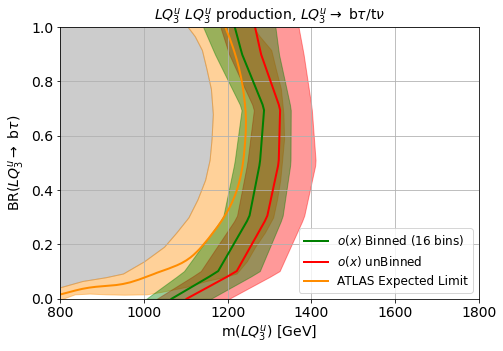

In [18]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 1800])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m($LQ_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR($LQ_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$LQ_3^u$ $LQ_3^u$ production, $LQ_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(loc = 'lower right', fontsize=12)
plt.savefig('exclusion_LQup.pdf', bbox_inches='tight')
plt.show()

In [30]:
# BR values
print(plotX_beta)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [31]:
# Mass values (BL)
print( mass_Z95CL_16bins(plotX_beta) )
print( mass_Z95CL_16bins_plus(plotX_beta) )
print( mass_Z95CL_16bins_min(plotX_beta) )

[1065.71137055 1088.31670814 1110.92204574 1133.52738333 1156.13272092
 1177.24153206 1184.88160509 1192.52167813 1200.16175117 1207.80182421
 1215.44189724 1223.08197028 1230.72204332 1238.36211636 1246.00218939
 1252.13408104 1254.74688277 1257.35968451 1259.97248624 1262.58528798
 1265.19808971 1267.81089145 1270.42369318 1273.03649492 1275.64929665
 1277.47339472 1278.50878911 1279.5441835  1280.57957789 1281.61497229
 1282.65036668 1283.68576107 1284.72115546 1285.75654985 1286.79194425
 1283.32628894 1277.93161234 1272.53693574 1267.14225914 1261.74758254
 1256.35290594 1250.95822934 1245.56355274 1240.16887614 1234.77419953
 1231.03346278 1227.47649711 1223.91953145 1220.36256579 1216.80560012]
[1159.44846158 1183.25218725 1207.05591292 1230.8596386  1254.66336427
 1276.64434844 1282.22065908 1287.79696972 1293.37328036 1298.949591
 1304.52590164 1310.10221228 1315.67852293 1321.25483357 1326.83114421
 1331.32384672 1333.28813026 1335.2524138  1337.21669735 1339.18098089
 1341.1

In [32]:
# Mass values (MLL)
print( mass_Z95CL_MLL(plotX_beta) )
print( mass_Z95CL_MLL_plus(plotX_beta) )
print( mass_Z95CL_MLL_min(plotX_beta) )

[1101.62603897 1125.96441533 1150.30279168 1174.64116804 1198.9795444
 1221.62901305 1229.07831239 1236.52761172 1243.97691105 1251.42621039
 1258.87550972 1266.32480905 1273.77410839 1281.22340772 1288.67270705
 1294.74082509 1297.58618679 1300.43154849 1303.27691019 1306.12227189
 1308.96763359 1311.81299528 1314.65835698 1317.50371868 1320.34908038
 1321.94996601 1322.30637558 1322.66278515 1323.01919472 1323.37560429
 1323.73201387 1324.08842344 1324.44483301 1324.80124258 1325.15765215
 1322.00058744 1317.33774804 1312.67490863 1308.01206923 1303.34922983
 1298.68639043 1294.02355103 1289.36071163 1284.69787222 1280.03503282
 1276.95370816 1274.04810736 1271.14250656 1268.23690576 1265.33130496]
[1203.28302933 1227.79619672 1252.30936411 1276.8225315  1301.33569888
 1323.99520121 1329.97171794 1335.94823467 1341.9247514  1347.90126814
 1353.87778487 1359.8543016  1365.83081834 1371.80733507 1377.7838518
 1382.83552384 1385.72922492 1388.622926   1391.51662707 1394.41032815
 1397.3

### Plot with the 300 and 3000 fb-1 limits

In [19]:
# RESULTS FROM LQup at 300 fb #

mass_Z95CL_16bins_300 = [1167.71760043, 1219.47326932, 1271.2289382 , 1322.98460709,
       1374.74027598, 1422.20565507, 1431.05842595, 1439.91119683,
       1448.76396771, 1457.61673859, 1466.46950948, 1475.32228036,
       1484.17505124, 1493.02782212, 1501.880593  , 1508.88328941,
       1511.56914539, 1514.25500136, 1516.94085734, 1519.62671331,
       1522.31256929, 1524.99842527, 1527.68428124, 1530.37013722,
       1533.05599319, 1534.78909473, 1535.56944183, 1536.34978892,
       1537.13013602, 1537.91048312, 1538.69083022, 1539.47117732,
       1540.25152441, 1541.03187151, 1541.81221861, 1538.86416342,
       1534.31822153, 1529.77227963, 1525.22633774, 1520.68039585,
       1516.13445396, 1511.58851207, 1507.04257018, 1502.49662829,
       1497.95068639, 1460.02158227, 1418.38323789, 1376.74489352,
       1335.10654914, 1293.46820477]
mass_Z95CL_16bins_plus_300 = [1229.61149753, 1291.95541705, 1354.29933657, 1416.64325608,
       1478.9871756 , 1536.09402145, 1546.06720432, 1556.04038718,
       1566.01357004, 1575.98675291, 1585.95993577, 1595.93311864,
       1605.9063015 , 1615.87948436, 1625.85266723, 1633.74613019,
       1636.78691338, 1639.82769658, 1642.86847977, 1645.90926296,
       1648.95004616, 1651.99082935, 1655.03161254, 1658.07239574,
       1661.11317893, 1663.17496924, 1664.25776668, 1665.34056412,
       1666.42336156, 1667.506159  , 1668.58895644, 1669.67175388,
       1670.75455132, 1671.83734875, 1672.92014619, 1670.63994077,
       1666.9184484 , 1663.19695604, 1659.47546367, 1655.75397131,
       1652.03247894, 1648.31098658, 1644.58949421, 1640.86800185,
       1637.14650948, 1600.03031441, 1559.20359682, 1518.37687923,
       1477.55016164, 1436.72344405]
mass_Z95CL_16bins_min_300 = [1122.81647096, 1166.32173542, 1209.82699987, 1253.33226432,
       1296.83752878, 1336.82601554, 1345.16350312, 1353.50099069,
       1361.83847826, 1370.17596584, 1378.51345341, 1386.85094098,
       1395.18842856, 1403.52591613, 1411.8634037 , 1418.4910298 ,
       1421.1289791 , 1423.7669284 , 1426.4048777 , 1429.042827  ,
       1431.6807763 , 1434.3187256 , 1436.9566749 , 1439.5946242 ,
       1442.2325735 , 1443.81671621, 1444.34705234, 1444.87738848,
       1445.40772461, 1445.93806074, 1446.46839687, 1446.998733  ,
       1447.52906913, 1448.05940526, 1448.5897414 , 1445.47331916,
       1440.79400048, 1436.11468181, 1431.43536313, 1426.75604445,
       1422.07672577, 1417.39740709, 1412.71808842, 1408.03876974,
       1403.35945106, 1369.64245735, 1332.69905531, 1295.75565327,
       1258.81225122, 1221.86884918]

mass_Z95CL_MLL_300 = [1210.97834435, 1266.76921808, 1322.5600918 , 1378.35096553,
       1434.14183926, 1485.29538154, 1494.71294091, 1504.13050027,
       1513.54805963, 1522.96561899, 1532.38317835, 1541.80073771,
       1551.21829707, 1560.63585644, 1570.0534158 , 1577.90358184,
       1582.0964968 , 1586.28941176, 1590.48232672, 1594.67524169,
       1598.86815665, 1603.06107161, 1607.25398657, 1611.44690154,
       1615.6398165 , 1618.11026791, 1618.85825578, 1619.60624364,
       1620.35423151, 1621.10221938, 1621.85020724, 1622.59819511,
       1623.34618298, 1624.09417084, 1624.84215871, 1621.51391331,
       1616.43871081, 1611.3635083 , 1606.28830579, 1601.21310328,
       1596.13790078, 1591.06269827, 1585.98749576, 1580.91229326,
       1575.83709075, 1541.00141175, 1502.85901313, 1464.71661452,
       1426.57421591, 1388.43181729]
mass_Z95CL_MLL_plus_300 = [1302.43804734, 1370.86103714, 1439.28402694, 1507.70701675,
       1576.13000655, 1638.95405568, 1651.38763874, 1663.8212218 ,
       1676.25480486, 1688.68838792, 1701.12197098, 1713.55555404,
       1725.9891371 , 1738.42272016, 1750.85630322, 1760.29896239,
       1762.76279917, 1765.22663594, 1767.69047272, 1770.15430949,
       1772.61814627, 1775.08198304, 1777.54581982, 1780.00965659,
       1782.47349336, 1784.8088791 , 1787.01581379, 1789.22274848,
       1791.42968317, 1793.63661786, 1795.84355255, 1798.05048724,
       1800.25742193, 1802.46435662, 1804.67129131, 1802.64017296,
       1798.79274618, 1794.94531939, 1791.09789261, 1787.25046582,
       1783.40303904, 1779.55561225, 1775.70818547, 1771.86075868,
       1768.0133319 , 1724.45180793, 1676.47760651, 1628.50340508,
       1580.52920365, 1532.55500222]
mass_Z95CL_MLL_min_300 = [1160.66586351, 1208.4907889 , 1256.3157143 , 1304.14063969,
       1351.96556508, 1395.91028042, 1404.93310522, 1413.95593003,
       1422.97875483, 1432.00157964, 1441.02440444, 1450.04722925,
       1459.07005405, 1468.09287886, 1477.11570366, 1484.46089386,
       1487.89160329, 1491.32231273, 1494.75302217, 1498.1837316 ,
       1501.61444104, 1505.04515048, 1508.47585991, 1511.90656935,
       1515.33727879, 1517.3370506 , 1517.90588477, 1518.47471895,
       1519.04355313, 1519.6123873 , 1520.18122148, 1520.75005566,
       1521.31888984, 1521.88772401, 1522.45655819, 1518.90501723,
       1513.5876012 , 1508.27018518, 1502.95276915, 1497.63535313,
       1492.3179371 , 1487.00052108, 1481.68310505, 1476.36568903,
       1471.048273  , 1436.68375339, 1399.09177782, 1361.49980226,
       1323.90782669, 1286.31585112]

In [20]:
# RESULTS FROM LQdown at 3000 fb #

mass_Z95CL_16bins_3000 = [1255.41703366, 1321.09109875, 1386.76516384, 1452.43922894,
       1518.11329403, 1578.23075708, 1588.33880181, 1598.44684654,
       1608.55489127, 1618.662936  , 1628.77098073, 1638.87902546,
       1648.98707018, 1659.09511491, 1669.20315964, 1677.03014673,
       1679.53466598, 1682.03918523, 1684.54370448, 1687.04822373,
       1689.55274299, 1692.05726224, 1694.56178149, 1697.06630074,
       1699.57082   , 1701.38604961, 1702.51198958, 1703.63792955,
       1704.76386953, 1705.8898095 , 1707.01574947, 1708.14168945,
       1709.26762942, 1710.39356939, 1711.51950936, 1709.80979043,
       1706.88478912, 1703.9597878 , 1701.03478648, 1698.10978517,
       1695.18478385, 1692.25978254, 1689.33478122, 1686.4097799 ,
       1683.48477859, 1640.37314551, 1592.79633113, 1545.21951675,
       1497.64270237, 1450.06588799]
mass_Z95CL_16bins_plus_3000 = [1360.95684154, 1429.85972362, 1498.76260569, 1567.66548776,
       1636.56836984, 1699.31323072, 1706.63590096, 1713.9585712 ,
       1721.28124144, 1728.60391168, 1735.92658191, 1743.24925215,
       1750.57192239, 1757.89459263, 1765.21726286, 1770.68363808,
       1771.81865823, 1772.95367839, 1774.08869855, 1775.2237187 ,
       1776.35873886, 1777.49375902, 1778.62877917, 1779.76379933,
       1780.89881949, 1782.04885395, 1783.21390271, 1784.37895148,
       1785.54400025, 1786.70904901, 1787.87409778, 1789.03914654,
       1790.20419531, 1791.36924408, 1792.53429284, 1791.53432627,
       1789.60649597, 1787.67866567, 1785.75083538, 1783.82300508,
       1781.89517479, 1779.96734449, 1778.0395142 , 1776.1116839 ,
       1774.18385361, 1739.09933793, 1700.33074609, 1661.56215426,
       1622.79356242, 1584.02497059]
mass_Z95CL_16bins_min_3000 = [1175.        , 1237.48042853, 1299.96085706, 1362.44128559,
       1424.92171412, 1482.26263894, 1493.34803033, 1504.43342171,
       1515.5188131 , 1526.60420448, 1537.68959587, 1548.77498725,
       1559.86037864, 1570.94577002, 1582.03116141, 1590.64450714,
       1593.48974633, 1596.33498553, 1599.18022473, 1602.02546392,
       1604.87070312, 1607.71594231, 1610.56118151, 1613.40642071,
       1616.2516599 , 1618.10418717, 1618.96400252, 1619.82381786,
       1620.68363321, 1621.54344855, 1622.40326389, 1623.26307924,
       1624.12289458, 1624.98270992, 1625.84252527, 1623.48496648,
       1619.74853306, 1616.01209964, 1612.27566622, 1608.5392328 ,
       1604.80279938, 1601.06636597, 1597.32993255, 1593.59349913,
       1589.85706571, 1550.47678604, 1507.13607901, 1463.79537198,
       1420.45466494, 1377.11395791]

mass_Z95CL_MLL_3000 = [1365.80130002, 1443.48399912, 1521.16669822, 1598.84939733,
       1676.53209643, 1747.34660227, 1756.34736875, 1765.34813522,
       1774.3489017 , 1783.34966817, 1792.35043464, 1801.35120112,
       1810.35196759, 1819.35273407, 1828.35350054, 1834.94357288,
       1835.90869222, 1836.87381156, 1837.8389309 , 1838.80405024,
       1839.76916958, 1840.73428892, 1841.69940826, 1842.6645276 ,
       1843.62964694, 1845.40341636, 1847.98583586, 1850.56825536,
       1853.15067486, 1855.73309436, 1858.31551387, 1860.89793337,
       1863.48035287, 1866.06277237, 1868.64519187, 1867.3419575 ,
       1864.37344289, 1861.40492829, 1858.43641369, 1855.46789908,
       1852.49938448, 1849.53086988, 1846.56235527, 1843.59384067,
       1840.62532607, 1791.88094366, 1738.05035371, 1684.21976377,
       1630.38917382, 1576.55858388]
mass_Z95CL_MLL_plus_3000 = [1462.43154153, 1547.67987657, 1632.92821161, 1718.17654665,
       1803.42488169, 1880.48534733, 1883.85498838, 1887.22462943,
       1890.59427048, 1893.96391153, 1897.33355258, 1900.70319363,
       1904.07283468, 1907.44247573, 1910.81211678, 1913.0702208 ,
       1912.7347384 , 1912.399256  , 1912.0637736 , 1911.72829119,
       1911.39280879, 1911.05732639, 1910.72184399, 1910.38636159,
       1910.05087919, 1911.16551819, 1913.7302786 , 1916.29503901,
       1918.85979941, 1921.42455982, 1923.98932023, 1926.55408064,
       1929.11884104, 1931.68360145, 1934.24836186, 1933.87701587,
       1932.24733858, 1930.61766129, 1928.98798399, 1927.3583067 ,
       1925.72862941, 1924.09895211, 1922.46927482, 1920.83959753,
       1919.20992023, 1878.81383878, 1834.11037908, 1789.40691939,
       1744.70345969, 1700.        ]
mass_Z95CL_MLL_min_3000 = [1304.61909207, 1371.79778346, 1438.97647484, 1506.15516622,
       1573.3338576 , 1635.03896742, 1647.48184319, 1659.92471896,
       1672.36759473, 1684.81047049, 1697.25334626, 1709.69622203,
       1722.1390978 , 1734.58197357, 1747.02484933, 1756.31431796,
       1758.24583658, 1760.17735519, 1762.10887381, 1764.04039243,
       1765.97191105, 1767.90342967, 1769.83494829, 1771.7664669 ,
       1773.69798552, 1775.86468836, 1778.26657541, 1780.66846247,
       1783.07034953, 1785.47223658, 1787.87412364, 1790.27601069,
       1792.67789775, 1795.0797848 , 1797.48167186, 1795.64951171,
       1792.00275991, 1788.3560081 , 1784.7092563 , 1781.06250449,
       1777.41575269, 1773.76900088, 1770.12224908, 1766.47549727,
       1762.82874547, 1713.48874301, 1659.07171271, 1604.6546824 ,
       1550.2376521 , 1495.8206218 ]

In [21]:
dummy = [1,3]

beta_13TeV_137 = [0.5, 0.6666, 1]
mass_13TeV_137 = [1550, 1650, 1810]

beta_136TeV_137 = [0.5, 0.6666]
mass_136TeV_137 = [1610, 1710]

beta_136TeV_300 = [0.5, 0.6666]
mass_136TeV_300 = [1690, 1790]

beta_136TeV_3000 = [0.5, 0.6666]
mass_136TeV_3000 = [1890, 1975]

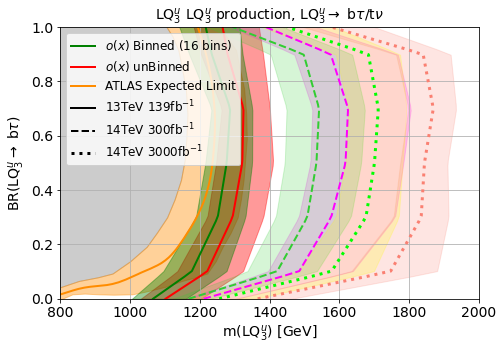

In [29]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})

test300 = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus_300,
                      'MLL_up': mass_Z95CL_MLL_min_300,
                     '16bins_low': mass_Z95CL_16bins_plus_300,
                      '16bins_up': mass_Z95CL_16bins_min_300})

colorsnum300 = pd.DataFrame({'BR': [0],
                    'MLL_low': [1],
                      'MLL_up': [1],
                     '16bins_low': [2],
                      '16bins_up': [2]})
colorsset300 = ['darkorange', 'magenta', 'limegreen']

test3000 = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus_3000,
                      'MLL_up': mass_Z95CL_MLL_min_3000,
                     '16bins_low': mass_Z95CL_16bins_plus_3000,
                      '16bins_up': mass_Z95CL_16bins_min_3000})

colorsnum3000 = pd.DataFrame({'BR': [0],
                    'MLL_low': [1],
                      'MLL_up': [1],
                     '16bins_low': [2],
                      '16bins_up': [2]})
colorsset3000 = ['darkorange', 'salmon', 'lime']

mineral_names = test.columns[1:]
mineral_names300 = test300.columns[1:]
mineral_names3000 = test3000.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
for mineral_name300 in mineral_names300[:-1]:
    ax.plot(test300[mineral_name300], test300['BR'], linewidth=2, color='None')#'-.', linewidth=2, color=colorsset300[colorsnum300[mineral_name300].tolist()[0]])

for mineral_name3000 in mineral_names3000[:-1]:
    ax.plot(test3000[mineral_name3000], test3000['BR'], linewidth=2, color='None')#':', linewidth=2, color=colorsset3000[colorsnum3000[mineral_name3000].tolist()[0]])
  
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
colors300 = [ "None", "magenta", "None", "limegreen", "None"]
previous_curve300 = 0
previous_name300 = ''
for mineral_name300, color300 in zip(mineral_names300, colors300):
    ax.fill_betweenx(test300['BR'], previous_curve300, test300[mineral_name300], color=color300, alpha=0.2)
    previous_curve300 = test300[mineral_name300]
    previous_name300 = mineral_name300
    
colors3000 = [ "None", "salmon", "None", "yellow", "None"]
previous_curve3000 = 0
previous_name3000 = ''
for mineral_name3000, color3000 in zip(mineral_names3000, colors3000):
    ax.fill_betweenx(test3000['BR'], previous_curve3000, test3000[mineral_name3000], color=color3000, alpha=0.2)
    previous_curve3000 = test3000[mineral_name3000]
    previous_name3000 = mineral_name3000
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.plot(mass_Z95CL_16bins_300, plotX_beta, '--', color='limegreen', lw=lw)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_300, plotX_beta, '--', color='magenta', lw=lw)#, label=r'$o(x)$ unBinned')

plt.plot(mass_Z95CL_16bins_3000, plotX_beta, ':', color='lime', lw=3)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_3000, plotX_beta, ':', color='salmon', lw=3)#, label=r'$o(x)$ unBinned')

plt.plot(dummy, dummy, '-', color='black', lw=lw, label=r'13TeV 139fb$^{-1}$') 
plt.plot(dummy, dummy, '--', color='black', lw=lw, label=r'14TeV 300fb$^{-1}$') 
plt.plot(dummy, dummy, ':', color='black', lw=3, label=r'14TeV 3000fb$^{-1}$') 

# plt.plot(mass_13TeV_137, beta_13TeV_137, 'o-', color='blue', lw=lw, label=r'2307.11070') 
# plt.plot(mass_136TeV_137, beta_136TeV_137, 'o-.', color='blue', lw=lw) 
# plt.plot(mass_136TeV_300, beta_136TeV_300, 'o--', color='blue', lw=lw) 
# plt.plot(mass_136TeV_3000, beta_136TeV_3000, 'o:', color='blue', lw=3) 


plt.xlim([800, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^u$ LQ$_3^u$ production, LQ$_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
#plt.legend(loc = 'lower right', fontsize=12)
#plt.legend( fontsize=12)
#plt.savefig('exclusion_LQup_limits.pdf', bbox_inches='tight')
plt.show()

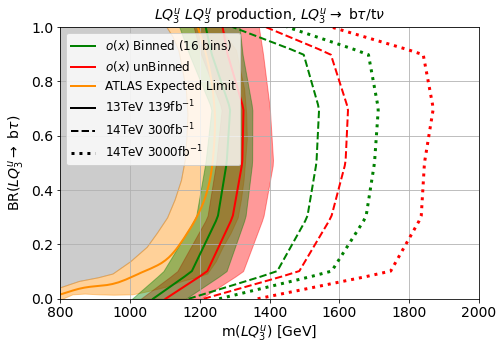

In [25]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.plot(mass_Z95CL_16bins_300, plotX_beta, '--', color='green', lw=lw)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_300, plotX_beta, '--', color='red', lw=lw)#, label=r'$o(x)$ unBinned')

plt.plot(mass_Z95CL_16bins_3000, plotX_beta, ':', color='green', lw=3)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_3000, plotX_beta, ':', color='red', lw=3)#, label=r'$o(x)$ unBinned')

plt.plot(dummy, dummy, '-', color='black', lw=lw, label=r'13TeV 139fb$^{-1}$') 
plt.plot(dummy, dummy, '--', color='black', lw=lw, label=r'14TeV 300fb$^{-1}$') 
plt.plot(dummy, dummy, ':', color='black', lw=3, label=r'14TeV 3000fb$^{-1}$') 

# plt.plot(mass_13TeV_137, beta_13TeV_137, 'o-', color='blue', lw=lw, label=r'2307.11070') 
# plt.plot(mass_136TeV_137, beta_136TeV_137, 'o-.', color='blue', lw=lw) 
# plt.plot(mass_136TeV_300, beta_136TeV_300, 'o--', color='blue', lw=lw) 
# plt.plot(mass_136TeV_3000, beta_136TeV_3000, 'o:', color='blue', lw=3) 

plt.xlim([800, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m($LQ_3^u$) [GeV]', fontsize=14)
plt.ylabel(r'BR($LQ_3^u \rightarrow$ b$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$LQ_3^u$ $LQ_3^u$ production, $LQ_3^u \rightarrow$ b$\tau$/t$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
#plt.legend(loc = 'lower right', fontsize=12)
#plt.legend( fontsize=12)
plt.savefig('exclusion_LQup_limits.pdf', bbox_inches='tight')
plt.show()